In [1]:
import pygmt
import numpy as np
import os
import pandas as pd
from pyrocko import util, model, io, trace, gmtpy
import pyrocko.moment_tensor as pmt
from pyrocko.plot import beachball
import matplotlib.pyplot as plt


In [2]:
workdir='../'
catdir =  os.path.join(workdir,'CAT')
catdir=os.path.join(catdir,'clustly')

clustydir='../../clusty_flegrei/results_FINAL'    ###CHANGE###
clusty_filename= os.path.join(clustydir,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')  ###CHANGE###
           
clusty_events = model.load_events(clusty_filename)

In [3]:
cluster_number=[]
for ev in clusty_events:
    if not ev.extras['cluster_number'] in cluster_number:
        cluster_number.append(ev.extras['cluster_number'])
cluster_number

[0, 2, 1, 4, -1, 3, 5, 6]

In [4]:
cls = {key: [] for key in cluster_number}
for ev in clusty_events:
    cls[ev.extras['cluster_number']].append(ev.moment_tensor)
del cls[-1]     #remove ev not clustered

In [5]:
for key in cls:
    print(f'cluster {key} with n ev = {len(cls[key])}')

cluster 0 with n ev = 14
cluster 2 with n ev = 4
cluster 1 with n ev = 15
cluster 4 with n ev = 4
cluster 3 with n ev = 4
cluster 5 with n ev = 5
cluster 6 with n ev = 5


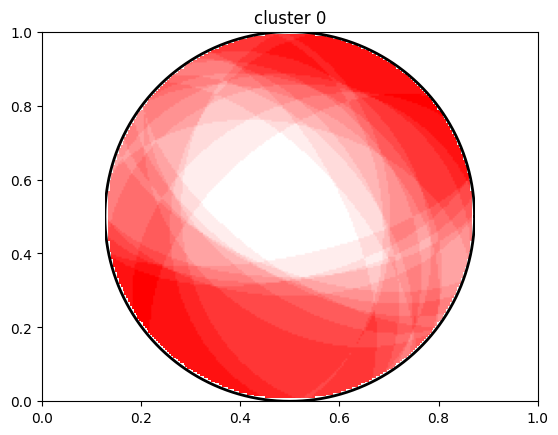

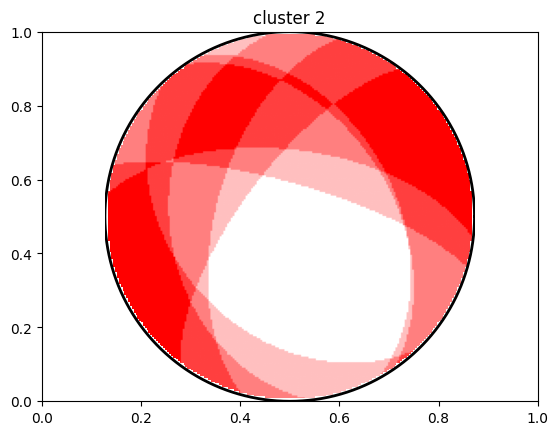

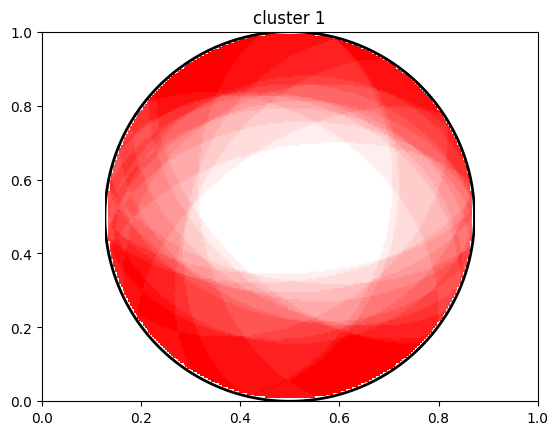

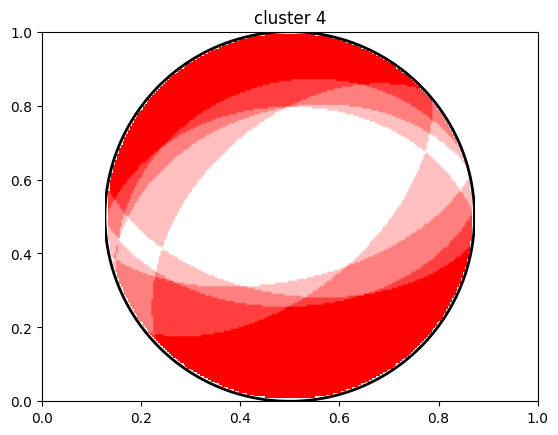

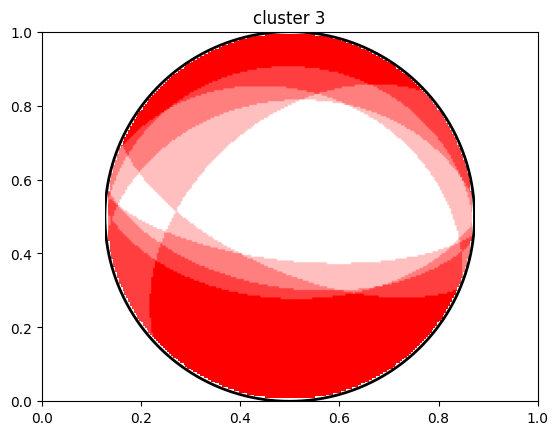

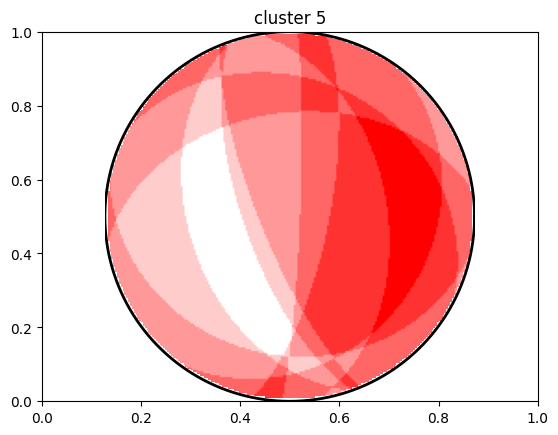

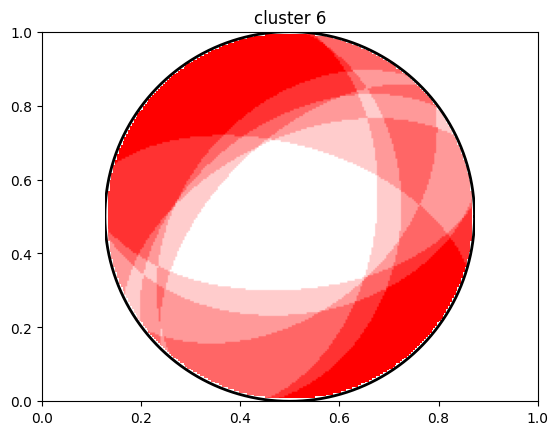

In [6]:
for keys in cls:
    fig = plt.figure()
    plt.title(f'cluster {keys}')
    axes = fig.add_subplot(1, 1, 1, aspect=1.)
    axes.axison = False
    beachball.plot_fuzzy_beachball_mpl_pixmap(cls[keys], axes, best_mt=None, 
        beachball_type='dc', position=(0.0, 0.0), 
        size=None, zorder=0, color_t='red', color_p='white', 
        edgecolor='black', best_color='red', linewidth=2, 
        alpha=1.0, projection='lambert', size_units='data',
          grid_resolution=200, method='imshow', view='top')
    